In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
print("Libraries loaded")

Libraries loaded


In [11]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
netflix.shape

(8807, 12)

In [14]:
#to see high level details
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
netflix.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1097,Movie,Sex Drive,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [20]:
netflix.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
description        0
listed_in          0
release_year       0
title              0
type               0
show_id            0
dtype: int64

In [21]:
missing_percentages = netflix.isna().sum().sort_values(ascending=False) / len(netflix) * 100
missing_percentages = missing_percentages[missing_percentages!=0]
df_missing_percentages = pd.DataFrame(missing_percentages).round(2)
df_missing_percentages = df_missing_percentages.reset_index().rename(columns = {"index":"Column", 0:"missing_percentage"})

In [22]:
missing_percentages

director      29.908028
country        9.435676
cast           9.367549
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64

In [23]:
df_missing_percentages

,Column,missing_percentage
0,director,29.91
1,country,9.44
2,cast,9.37
3,date_added,0.11
4,rating,0.05
5,duration,0.03


### Let's plot and see the missing data

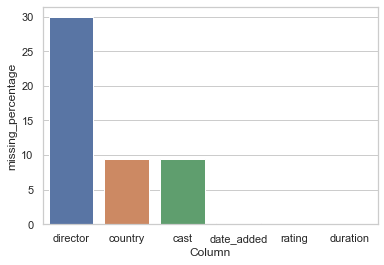

In [25]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Column", y="missing_percentage", data = df_missing_percentages)

#### The director column has the most missing data so we now need to deal with the missing data first before proceding 

## Data Cleaning

In [26]:
netflix['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

The ratings data has some some incorrect entries that we need to set

In [27]:
netflix['rating'] = netflix['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})
netflix['rating'] = netflix['rating'].replace({'TV-Y7-FV': 'TV-Y7'})
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'UR'], dtype=object)

In [28]:
# Renaming vaules for Rating for better understanding
netflix['rating'] = netflix['rating'].replace({
                'PG-13': 'Teens - Age above 12',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens - Age above 14',
                'TV-PG': 'Kids - with parental guidence',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids - Age above 7',
                'R': 'Adults',
                'TV-G': 'Kids',
                 'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'NR',
                'UR' : 'UR'
                
})

In [31]:
netflix.rating.unique()

array(['Teens - Age above 12', 'Adults', 'Kids - with parental guidence',
       'Teens - Age above 14', 'Kids', 'Kids - Age above 7', 'NR', nan,
       'UR'], dtype=object)

In [34]:
netflix.country = netflix.country.fillna(netflix.country.mode()[0])

In [35]:
netflix.country.isnull().sum()

0

In [19]:
netflix.country.isna().sum()

0

dealt with the missing data of country, let's deal with other columns now

In [36]:
netflix.cast.replace(np.nan, 'None', inplace = True)
netflix.director.replace(np.nan, 'None', inplace = True)
netflix.dropna(inplace = True)
netflix.drop_duplicates(inplace = True)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,Teens - Age above 12,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,United States,"September 24, 2021",2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [39]:
missing_percentages2 = netflix.isna().sum().sort_values(ascending=False) / len(netflix) * 100
missing_percentages2.round(0)

description     0.0
listed_in       0.0
duration        0.0
rating          0.0
release_year    0.0
date_added      0.0
country         0.0
cast            0.0
director        0.0
title           0.0
type            0.0
show_id         0.0
dtype: float64

In [40]:
#Let's drop the column that we don't need like show_id and etc
df_clean = netflix.drop(['show_id','cast','description'], axis = 1)
df_clean.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,Teens - Age above 12,90 min,Documentaries
1,TV Show,Blood & Water,None,South Africa,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,United States,"September 24, 2021",2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,None,United States,"September 24, 2021",2021,Adults,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,None,India,"September 24, 2021",2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [41]:
df_clean.shape

(8790, 9)

## Visualization

We'll try to answer some of the questions from the data

In [42]:
#Let's start with the type of content netflix have
df_clean.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [43]:
df_clean['release_year'].max()

2021

In [44]:
df_clean['release_year'].min()

1925

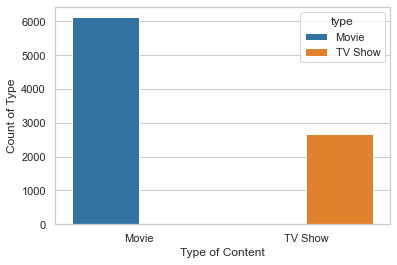

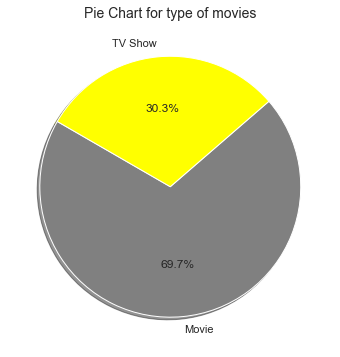

In [46]:
#Count plot of type of movies
ax = sns.countplot(x="type", data=df_clean, palette="tab10", hue = "type")
ax.set(xlabel="Type of Content", ylabel="Count of Type")

#Pie Chart of type of movies
sns.color_palette("hls", 8)
type_counts = df_clean.type.value_counts()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(type_counts, labels = type_counts.index, autopct="%1.1f%%",startangle=150, shadow=True, explode=None, colors = ['Grey','Yellow'])
plt.title("Pie Chart for type of movies", fontsize=14);


In [47]:
df_clean.country.value_counts()

United States                                 3638
India                                          972
United Kingdom                                 418
Japan                                          243
South Korea                                    199
                                              ... 
United States, United Kingdom, Morocco           1
United States, United Kingdom, New Zealand       1
United Arab Emirates, Jordan                     1
United Kingdom, Russia                           1
Venezuela                                        1
Name: country, Length: 748, dtype: int64

#### First, we've to seperate the countries before making any visualization on country

In [48]:
# splitting the countries in different rows 
country_df = df_clean[['title','type', 'country' ]]
country_df = (country_df.drop('country', axis=1)
              .join(country_df.country.str.split(', ',expand=True).stack().reset_index(drop=True, level=1).rename('country')))
country_df.head()

,title,type,country
0,Dick Johnson Is Dead,Movie,United States
1,Blood & Water,TV Show,South Africa
2,Ganglands,TV Show,United States
3,Jailbirds New Orleans,TV Show,United States
4,Kota Factory,TV Show,India


In [49]:
country_df.head(10)

,title,type,country
0,Dick Johnson Is Dead,Movie,United States
1,Blood & Water,TV Show,South Africa
2,Ganglands,TV Show,United States
3,Jailbirds New Orleans,TV Show,United States
4,Kota Factory,TV Show,India
5,Midnight Mass,TV Show,United States
6,My Little Pony: A New Generation,Movie,United States
7,Sankofa,Movie,United States
7,Sankofa,Movie,Ghana
7,Sankofa,Movie,Burkina Faso


In [50]:
country_df.country.nunique()

127

In [51]:
#as we can see we have records from 127 different countries, we'll only work with top 10 highest contributing countries
top_ten_countries = country_df.country.value_counts().sort_values(ascending=False)[:10]
top_ten_countries

United States     4509
India             1046
United Kingdom     803
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

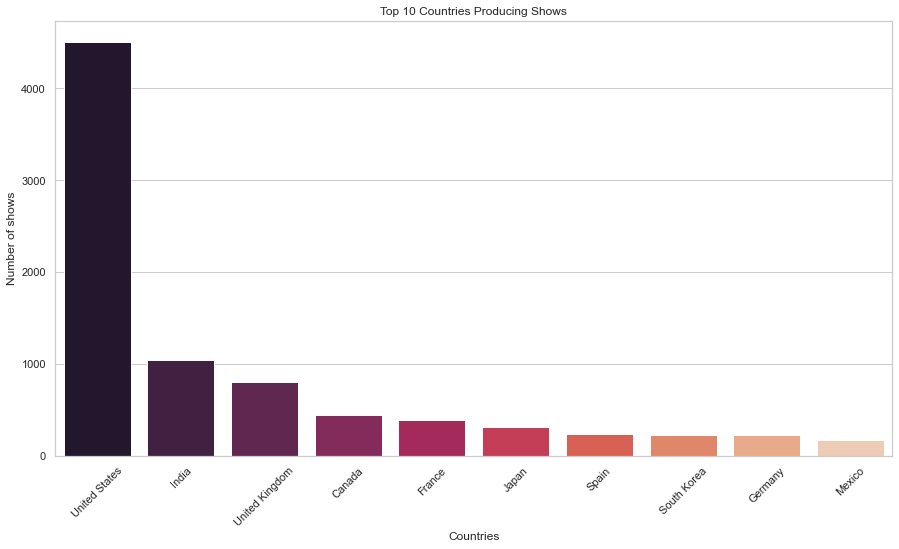

In [52]:
x_countries = top_ten_countries.index
y_countries = top_ten_countries.values
plt.figure(figsize=(15,8))
plt.title("Top 10 Countries Producing Shows")
plt.xlabel("Countries")
plt.ylabel("Number of shows")
plt.xticks(rotation = 45)
sns.barplot(x= x_countries, y = y_countries, palette = 'rocket')
plt.show()

#### Takeaway: As we can see that the United States, India, and United Kingtom are the top contributing countries.

In [53]:
temp_df = country_df.loc[country_df['country'].isin(top_ten_countries.index)]
temp_df.head()

,title,type,country
0,Dick Johnson Is Dead,Movie,United States
2,Ganglands,TV Show,United States
3,Jailbirds New Orleans,TV Show,United States
4,Kota Factory,TV Show,India
5,Midnight Mass,TV Show,United States


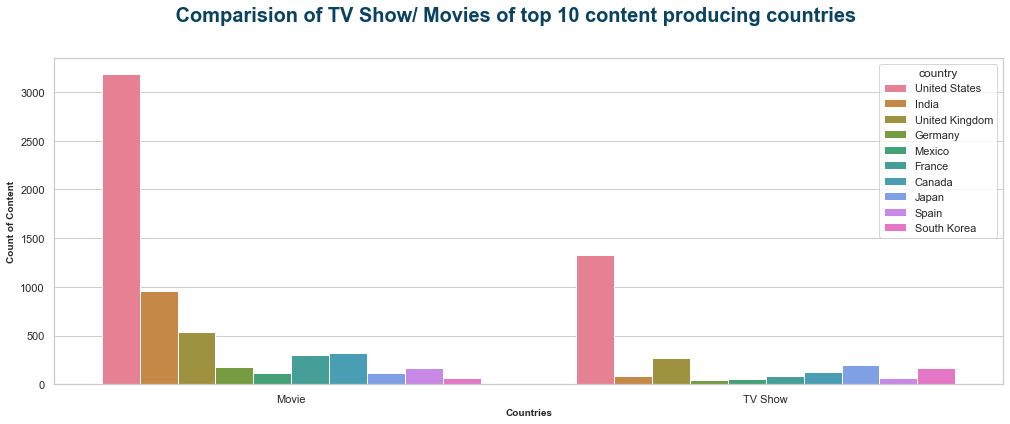

In [54]:
#let's see side by side comparision
plt.figure(figsize=(17,6))
plot = sns.countplot(x='type',data=temp_df,hue='country',palette='husl')
plot.set_ylabel("Count of Content",fontsize=10, weight='bold')
plot.set_xlabel("Countries",fontsize=10,weight='bold')
plt.legend(title='country', loc='upper right')
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193"]
plot.figure.suptitle(' Comparision of TV Show/ Movies of top 10 content producing countries',y=1, size = 20, color = theme[3], weight='bold');

In [55]:
#now checking type of content based on country
movie_countries = country_df[country_df['type']=='Movie']
tv_show_countries = country_df[country_df['type']=='TV Show']

In [56]:
top_ten_movie_countries = movie_countries.country.value_counts().sort_values(ascending=False)[:10]
top_ten_tv_show_countries = tv_show_countries.country.value_counts().sort_values(ascending=False)[:10]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


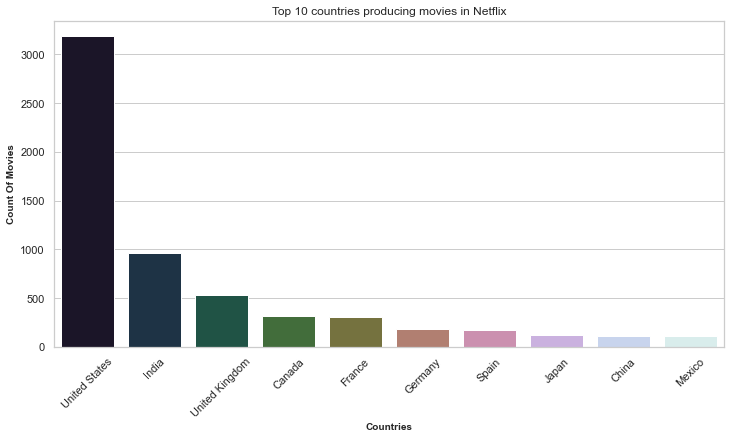

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


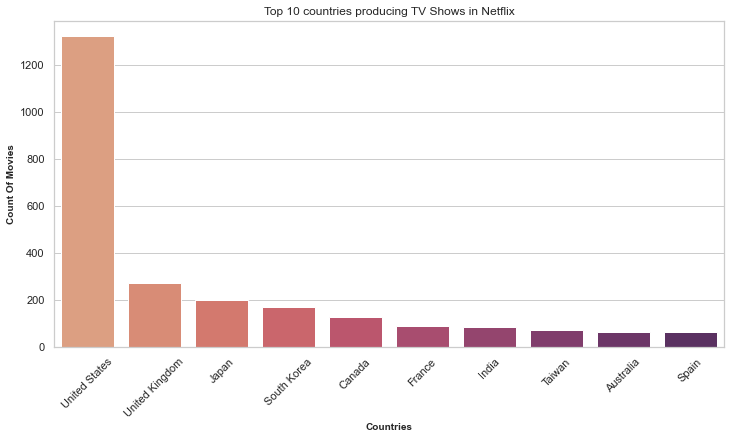

In [57]:
plt.subplots(figsize=(12,6))
sns.barplot(top_ten_movie_countries.index, top_ten_movie_countries.values,palette="cubehelix")
plt.title("Top 10 countries producing movies in Netflix")
plt.xlabel("Countries",fontsize=10,weight='bold')
plt.ylabel("Count Of Movies",fontsize=10, weight='bold')
plt.xticks(rotation = 45)
plt.show()

plt.subplots(figsize=(12,6))
sns.barplot(top_ten_tv_show_countries.index, top_ten_tv_show_countries.values,palette="flare")
plt.title("Top 10 countries producing TV Shows in Netflix")
plt.xlabel("Countries",fontsize=10,weight='bold')
plt.ylabel("Count Of Movies",fontsize=10, weight='bold')
plt.xticks(rotation = 45)
plt.show()


##### Takeaway: As we can see that the united states is the highest tv show and movie both producing countries.

In [58]:
#Let's check categories for which the maximum movie content is uploaded

movie_ratings = df_clean[df_clean.type == 'Movie']
movie_ratings_df = pd.DataFrame(movie_ratings.rating.value_counts()).reset_index().rename(columns = {"index": "Ratings", "rating": "Number_of_Movies"})
movie_ratings_df.head()

,Ratings,Number_of_Movies
0,Adults,2862
1,Teens - Age above 14,1427
2,Kids - with parental guidence,827
3,Teens - Age above 12,490
4,Kids,298


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


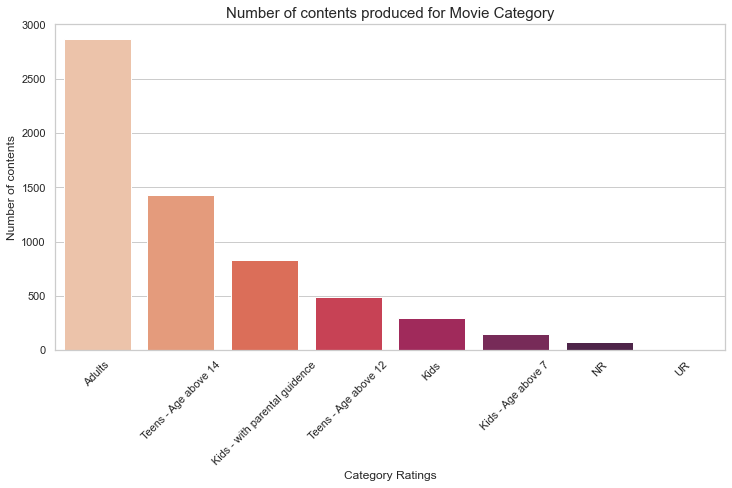

In [59]:
plt.subplots(figsize=(12,6))
sns.barplot(movie_ratings_df.Ratings, movie_ratings_df.Number_of_Movies,palette="rocket_r")
plt.title("Number of contents produced for Movie Category",fontsize=15)
plt.ylabel("Number of contents")
plt.xlabel('Category Ratings')
plt.xticks(rotation = 45)
plt.show()

In [61]:
tv_show_ratings = df_clean[df_clean.type == 'TV Show']
tv_show_ratings = pd.DataFrame(tv_show_ratings.rating.value_counts()).reset_index().rename(columns = {"index": "Ratings", "rating": "Number_of_Shows"})
tv_show_ratings.head()

,Ratings,Number_of_Shows
0,Adults,1145
1,Teens - Age above 14,730
2,Kids - with parental guidence,321
3,Kids,269
4,Kids - Age above 7,195


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


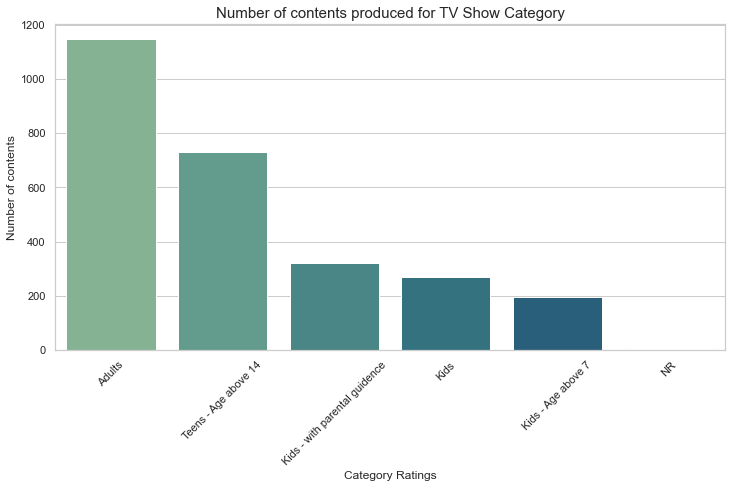

In [63]:
plt.subplots(figsize=(12,6))
sns.barplot(tv_show_ratings.Ratings, tv_show_ratings.Number_of_Shows,palette="crest")
plt.title("Number of contents produced for TV Show Category",fontsize=15)
plt.ylabel("Number of contents")
plt.xlabel('Category Ratings')
plt.xticks(rotation = 45)
plt.show()

In [64]:
#Let's check which top 10 years have the most released content
year_df = pd.DataFrame(df_clean.release_year.value_counts()).reset_index().rename(columns= {"index":"release_year", "release_year":"total_content_released"})
year_df

,release_year,total_content_released
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901
...,...,...
69,1959,1
70,1961,1
71,1925,1
72,1947,1


Text(0, 0.5, 'Content Released')

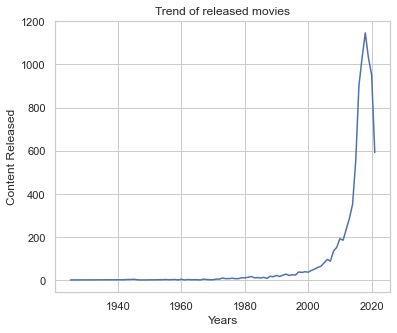

In [65]:
plt.figure(figsize=(6,5))
sns.lineplot(x=year_df['release_year'], y=year_df["total_content_released"])
plt.title("Trend of released movies")
plt.xlabel("Years")
plt.ylabel("Content Released")

#### Takeaway: As we can see from the graph that from 2017-2020 has been the most released content years in NETFLIX

In [66]:
earliest_year = year_df.sort_values("release_year").reset_index().drop("index", axis=1).release_year[0]
latest_year = year_df.sort_values("release_year", ascending=False).reset_index().drop("index", axis=1).release_year[0]

bins = latest_year- earliest_year
bins

96

Text(0, 0.5, 'Content Released')

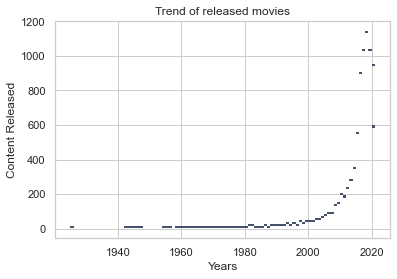

In [67]:
sns.histplot(data = year_df, x="release_year", y="total_content_released", bins = bins, kde= True)
plt.title("Trend of released movies")
plt.xlabel("Years")
plt.ylabel("Content Released")

In [68]:
#Let's check which top 10 years have the most released content movie & Tv show
movie_content = df_clean[df_clean.type == 'Movie']
tv_show_content = df_clean[df_clean.type == 'TV Show']

movie_year_df = pd.DataFrame(movie_content.release_year.value_counts()).reset_index().rename(columns= {"index":"release_year", "release_year":"total_content_released"})
tv_show_year_df = pd.DataFrame(tv_show_content.release_year.value_counts()).reset_index().rename(columns= {"index":"release_year", "release_year":"total_content_released"})

In [69]:
movie_year_df

,release_year,total_content_released
0,2018,767
1,2017,765
2,2016,658
3,2019,633
4,2020,517
...,...,...
68,1961,1
69,1947,1
70,1959,1
71,1963,1


In [70]:
tv_show_year_df

,release_year,total_content_released
0,2020,436
1,2019,397
2,2018,379
3,2021,315
4,2017,265
5,2016,243
6,2015,159
7,2014,88
8,2012,63
9,2013,61


Text(0, 0.5, 'Content Released')

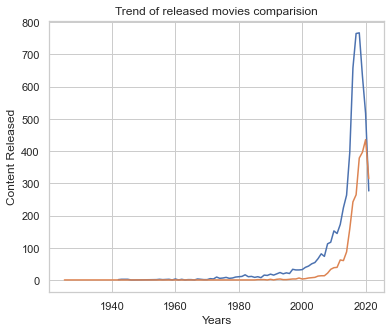

In [71]:
plt.figure(figsize=(6,5))
sns.lineplot(x=movie_year_df['release_year'], y=movie_year_df["total_content_released"])
sns.lineplot(x=tv_show_year_df['release_year'], y=tv_show_year_df["total_content_released"])
plt.title("Trend of released movies comparision")
plt.xlabel("Years")
plt.ylabel("Content Released")

Results: The blue line is the increasing trend line for movie content and the read line is for tv show content. Both seem to follow increasing pattern after 2015 to 2020

### Movie Based Genre

In [72]:
df_temp = df_clean.query("type == 'Movie'")
# splitting the Genre in different rows to visualize it
df_temp = df_temp[['title','type', 'country', 'listed_in']]
df_temp = (df_temp.drop('listed_in', axis=1)
              .join(df_temp.listed_in.str.split(', ',expand=True).stack().reset_index(drop=True, level=1).rename('Genre')))
df_temp.head()

,title,type,country,Genre
0,Dick Johnson Is Dead,Movie,United States,Documentaries
6,My Little Pony: A New Generation,Movie,United States,Children & Family Movies
7,Sankofa,Movie,"United States, Ghana, Burkina Faso, United Kin...",Dramas
7,Sankofa,Movie,"United States, Ghana, Burkina Faso, United Kin...",Independent Movies
7,Sankofa,Movie,"United States, Ghana, Burkina Faso, United Kin...",International Movies


In [73]:
df_temp.Genre.unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

In [75]:
df_temp.Genre.unique().size

20

In [76]:
Genre_df = pd.DataFrame(df_temp.Genre.value_counts().sort_values(ascending=False)).reset_index().rename(columns = {"index":"Genre", "Genre":"Count"})
Genre_df.head()

,Genre,Count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859


In [79]:
df_temp.Genre.head(20)

0                Documentaries
6     Children & Family Movies
7                       Dramas
7           Independent Movies
7         International Movies
9                     Comedies
9                       Dramas
12                      Dramas
12        International Movies
13    Children & Family Movies
13                    Comedies
16               Documentaries
16        International Movies
18                   Thrillers
22                    Comedies
22        International Movies
23    Children & Family Movies
24                    Comedies
24        International Movies
24             Romantic Movies
Name: Genre, dtype: object

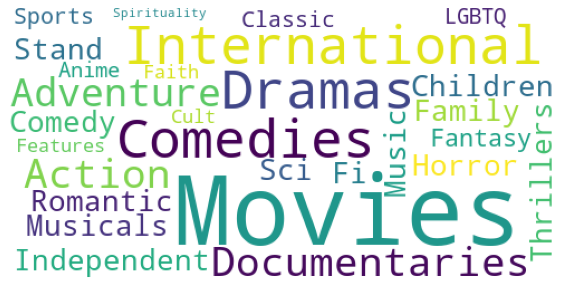

In [82]:
#Plotting wordcloud to see the most common genre
from wordcloud import WordCloud
Genres = Genre_df.Genre.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(Genres))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


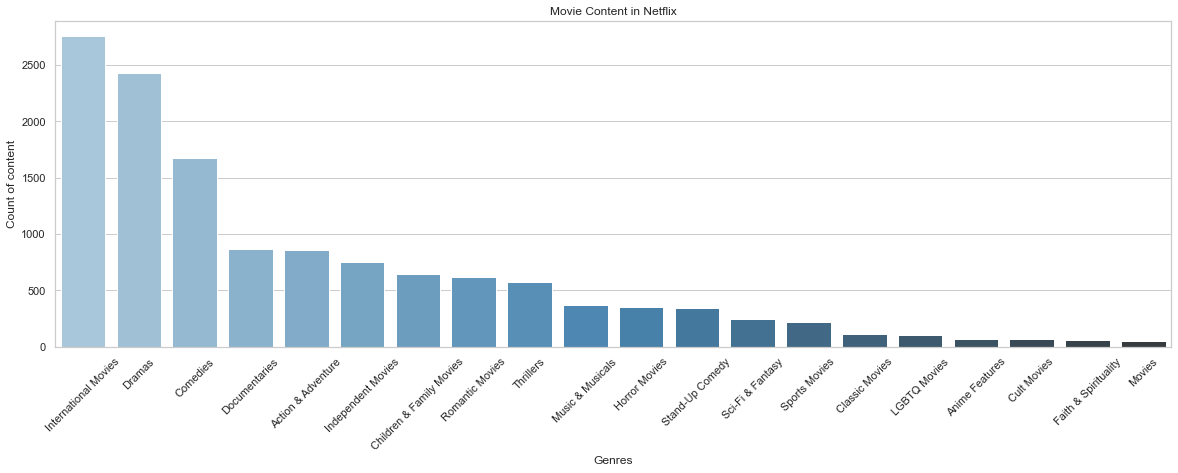

In [83]:
plt.subplots(figsize=(20,6))
sns.barplot(Genre_df.Genre,Genre_df.Count,palette='Blues_d')
plt.title('Movie Content in Netflix')
plt.xlabel('Genres')
plt.ylabel('Count of content')
plt.xticks(rotation= 45)
plt.show()

Result: International Movies have been the most popular genre for Movie category followed by Dramas and Comedies

### TV Show Genre

In [84]:
tv_show_temp = df_clean.query("type == 'TV Show'")
# splitting the Genre in different rows to visualize it
tv_show_temp = tv_show_temp[['title','type', 'country', 'listed_in']]
tv_show_temp = (tv_show_temp.drop('listed_in', axis=1)
              .join(tv_show_temp.listed_in.str.split(', ',expand=True).stack().reset_index(drop=True, level=1).rename('Genre')))
tv_show_temp.head()

,title,type,country,Genre
1,Blood & Water,TV Show,South Africa,International TV Shows
1,Blood & Water,TV Show,South Africa,TV Dramas
1,Blood & Water,TV Show,South Africa,TV Mysteries
2,Ganglands,TV Show,United States,Crime TV Shows
2,Ganglands,TV Show,United States,International TV Shows


In [52]:
tv_show_temp.Genre.unique()

array(['International TV Shows', 'TV Dramas', 'TV Mysteries',
       'Crime TV Shows', 'TV Action & Adventure', 'Docuseries',
       'Reality TV', 'Romantic TV Shows', 'TV Comedies', 'TV Horror',
       'British TV Shows', 'Spanish-Language TV Shows', 'TV Thrillers',
       "Kids' TV", 'TV Sci-Fi & Fantasy', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'TV Shows', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV'],
      dtype=object)

In [85]:
tv_show_temp.Genre.unique().size

22

In [86]:
Tv_show_Genre_df = pd.DataFrame(tv_show_temp.Genre.value_counts().sort_values(ascending=False)).reset_index().rename(columns = {"index":"Genre", "Genre":"Count"})
Tv_show_Genre_df.head()

,Genre,Count
0,International TV Shows,1349
1,TV Dramas,762
2,TV Comedies,573
3,Crime TV Shows,469
4,Kids' TV,448


In [87]:
Tv_show_Genre_df.head(20)

,Genre,Count
0,International TV Shows,1349
1,TV Dramas,762
2,TV Comedies,573
3,Crime TV Shows,469
4,Kids' TV,448
5,Docuseries,394
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,252
9,Anime Series,174


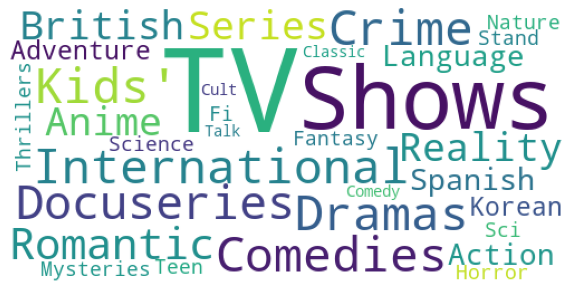

In [89]:
#Plotting wordcloud to see the most common genre
from wordcloud import WordCloud
Genres = Tv_show_Genre_df.Genre.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(Genres))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


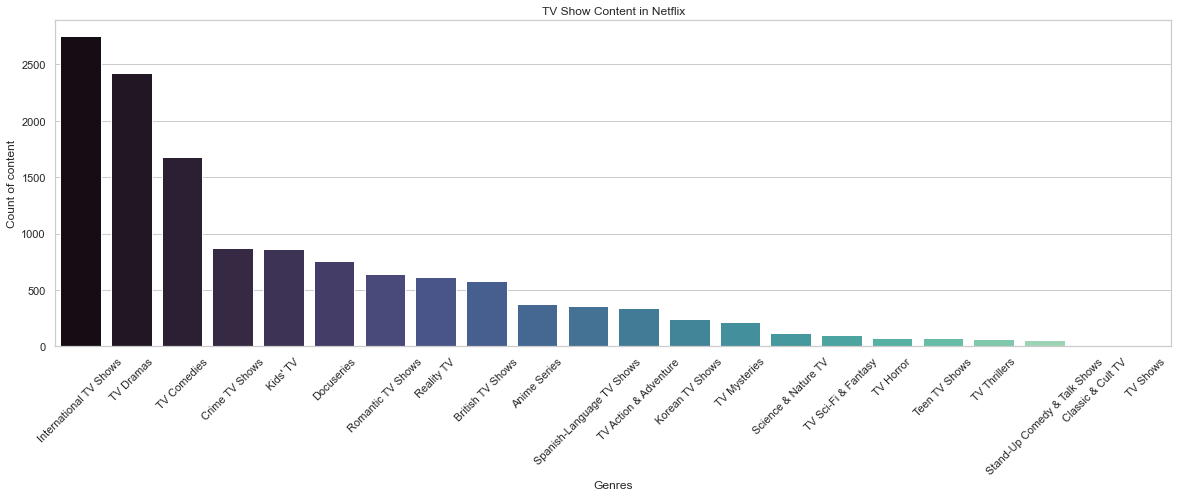

In [90]:
plt.subplots(figsize=(20,6))
sns.barplot(Tv_show_Genre_df.Genre,Genre_df.Count,palette='mako')
plt.title('TV Show Content in Netflix')
plt.xlabel('Genres')
plt.ylabel('Count of content')
plt.xticks(rotation= 45)
plt.show()

Takeaway: International TV Shows have been the most popular TV Show content on netflix followed by TV Dramas and TV Comedies